In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astroML.stats
from astropy.table import Table

import pandas
pandas.set_option('display.max_columns', None)

%matplotlib inline
#%config InlineBackend.figure_format='retina'
plt.style.use(['labstyle.mplstyle']) 

# Functions

In [168]:
def Plot(x_data, y_data, x_label='', y_label='', data_mask=None, 
         xlog=True, ylog=True, x_min=None, x_max=None, y_min=None, y_max=None, hist2d_nbins=200, 
         x_min_bins=None, x_max_bins=None, xbins=40):
    
    if x_min==None: x_min = np.min(x_data)
    if x_max==None: x_max = np.max(x_data)
    if y_min==None: y_min = np.min(y_data)
    if y_max==None: y_max = np.max(y_data)
    
    
    # Define the figure
    fig, ax = plt.subplots(1, figsize=(10,9))
    ax.set_box_aspect(1)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    if xlog==True: ax.set_xscale('log')
    if ylog==True: ax.set_yscale('log')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    
    # Plot the 2d-histogram
    binx = np.logspace(start=np.log10(x_min), stop=np.log10(x_max), num=hist2d_nbins)
    biny = np.logspace(start=np.log10(y_min), stop=np.log10(y_max), num=hist2d_nbins)
    hist = ax.hist2d(x_data, y_data, bins=(binx, biny), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.coolwarm, alpha=0.5)
    cax = fig.add_axes([0.91, 0.11, 0.02, 0.77])
    fig.colorbar(hist[3], cax=cax, label='$N_{points}/bin$')
    
    
    # Plot the statistics
    if data_mask is not None:
        x_data = x_data[data_mask]
        y_data = y_data[data_mask]
    
    if x_min_bins==None: x_min_bins = x_min
    if x_max_bins==None: x_max_bins = x_max
    
    bin_edges = np.logspace(start=np.log10(x_min_bins), stop=np.log10(x_max_bins), num=xbins+1)
    statistics = np.zeros(shape=(int(xbins), 5))
    
    for i in range(int(xbins)):
        mask_bin = ((x_data>=bin_edges[i]) & (x_data<bin_edges[i+1]))
        x_temp = np.array(x_data[mask_bin])
        y_temp = np.array(y_data[mask_bin])
        N_temp = int(len(x_temp))
        statistics[i] = np.array([N_temp, 
                                  np.median(x_temp), 
                                  np.median(y_temp), 
                                  np.quantile(y_temp, 0.25),
                                  np.quantile(y_temp, 0.75)])

    ax.plot(statistics[:,1], statistics[:,2], color='black', label = "medians of the MS galaxies")
    ax.plot(statistics[:,1], statistics[:,3], color='black', alpha=0.5)
    ax.plot(statistics[:,1], statistics[:,4], color='black', alpha=0.5)
    ax.fill_between(statistics[:,1], statistics[:,3], statistics[:,4], color='gray', alpha=0.15)
     
    return fig, ax, statistics, hist

# Analyze the input data

In [4]:
data = Table.read('SDSS_LAB2024_photometry.fits', format='fits')
data = data.to_pandas()
data

,id,ra,dec,redshift,sdss.up,sdss.up_err,sdss.gp,sdss.gp_err,sdss.rp,sdss.rp_err,sdss.ip,sdss.ip_err,sdss.zp,sdss.zp_err
0,1237657873254907919,140.153626,39.308208,0.028312,0.119670,0.020435,1.029917,0.012816,1.621148,0.022931,1.954847,0.023217,2.286192,0.059580
1,1237657873254973544,140.325684,39.456471,0.056195,0.091612,0.006626,0.247744,0.003121,0.358206,0.004741,0.453588,0.007278,0.492240,0.025029
2,1237654880726286453,190.287293,5.309674,0.074970,0.045000,0.004752,0.214703,0.004054,0.462379,0.007594,0.667785,0.011125,0.835854,0.022765
3,1237654880727728243,193.587524,5.282654,0.048760,0.466016,0.013479,1.720028,0.006990,2.967451,0.009481,4.098367,0.018062,4.911618,0.059197
4,1237654880728842356,196.179871,5.124015,0.054671,0.147323,0.008597,0.379945,0.003792,0.529207,0.006502,0.663836,0.009359,0.737546,0.032889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92478,1237654881812545849,219.128952,5.382636,0.029722,0.130263,0.007935,0.621287,0.008810,1.230597,0.015837,1.698397,0.020601,2.189831,0.033350
92479,1237654881814511891,223.538071,5.049211,0.028227,0.050782,0.006481,0.183128,0.002653,0.343451,0.003437,0.469283,0.005994,0.610483,0.021694
92480,1237651823782396044,214.389114,5.217847,0.079587,0.126914,0.013361,0.634937,0.021585,1.301933,0.033164,1.929476,0.038042,2.559679,0.063614
92481,1237651823782985830,215.724396,5.183447,0.056425,0.101443,0.014067,0.449638,0.008164,0.778556,0.010234,0.989564,0.016335,1.230477,0.053690


# Analyze the output data

In [5]:
results = Table.read('SDSS_LAB2024_PROFresults.fits', format='fits')
results = results.to_pandas()
results

,id,bayes.attenuation.E_BVs.stellar.young,bayes.attenuation.E_BVs.stellar.young_err,bayes.sfh.age,bayes.sfh.age_err,bayes.sfh.tau_main,bayes.sfh.tau_main_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.sdss.gp,bayes.sdss.gp_err,bayes.sdss.ip,bayes.sdss.ip_err,bayes.sdss.rp,bayes.sdss.rp_err,bayes.sdss.up,bayes.sdss.up_err,bayes.sdss.zp,bayes.sdss.zp_err,best.chi_square,best.reduced_chi_square,best.attenuation.B_B90,best.attenuation.E_BVs.nebular.continuum_old,best.attenuation.E_BVs.nebular.continuum_young,best.attenuation.E_BVs.nebular.lines_old,best.attenuation.E_BVs.nebular.lines_young,best.attenuation.E_BVs.stellar.old,best.attenuation.E_BVs.stellar.young,best.attenuation.V_B90,best.attenuation.ebvs_old_factor,best.attenuation.powerlaw_slope,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.nebular.ne,best.nebular.zgas,best.sfh.age,best.sfh.burst_age,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.stellar.old,best.attenuation.stellar.young,best.dust.luminosity,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.sdss.up,best.sdss.gp,best.sdss.rp,best.sdss.ip,best.sdss.zp
0,1237657873254907919,0.246312,0.195925,1999.112517,960.516317,373.966355,291.577328,0.205591,0.291975,3.947004e+09,8.204043e+08,0.834379,0.032023,1.984993,0.023976,1.515246,0.024553,0.206598,0.013534,2.510062,0.068503,32.328839,8.082210,1.164679,0.220,0.50,0.220,0.50,0.220,0.50,0.925299,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1100.0,1.0,0.0,1.0,300.0,820.907242,1.0,0.02,10.0,13368.111980,3.803276e+24,0.028312,6.963647e+32,5.257564e+34,1.558116e+33,1.111303e+35,2.340102e+36,9.190453e+35,3.425108e+36,5.412972e+09,0.474101,0.561744,0.481288,6.322693e+36,2.342789e+35,4.989946e+33,2.292889e+35,5.136567e+36,1.186126e+36,2.039222e+09,2.038934e+09,2.873732e+05,3.373750e+09,3.369225e+09,4.525509e+06,7.058673e+52,1.149902e+51,6.943682e+52,0.213476,0.875874,1.496543,1.975366,2.490150
1,1237657873254973544,0.242590,0.147526,4242.216616,2997.810626,8458.942235,3979.155808,1.233340,0.809994,2.975272e+09,1.105974e+09,0.242731,0.006881,0.448915,0.007785,0.348413,0.003826,0.095799,0.005866,0.524433,0.017343,0.295336,0.073834,0.251790,0.044,0.10,0.044,0.10,0.044,0.10,0.194575,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1800.0,1.0,0.0,1.0,700.0,1226.855537,1.0,0.02,10.0,13003.015620,7.708407e+24,0.056195,1.853166e+32,2.494295e+34,4.675935e+32,5.990855e+34,4.194243e+35,5.103567e+35,1.015285e+36,3.682253e+09,0.435609,0.467926,0.438422,4.073873e+36,2.137705e+35,3.708738e+33,2.100617e+35,2.990447e+36,1.083426e+36,1.466159e+09,1.465899e+09,2.607138e+05,2.216093e+09,2.211970e+09,4.123507e+06,6.450897e+52,8.871794e+50,6.362179e+52,0.092026,0.250001,0.361656,0.444360,0.507239
2,1237654880726286453,0.346988,0.297202,6976.770465,3166.220618,3606.148039,3770.936761,1.715091,2.535770,2.219241e+10,5.856282e+09,0.207946,0.005878,0.652436,0.009215,0.448584,0.017435,0.049471,0.004802,0.884839,0.029827,0.344524,0.086131,0.778373,0.154,0.35,0.154,0.35,0.154,0.35,0.626742,0.44,0.0,0.0,217.5,35.0,0.0,0.0,300.0,-2.0,100.0,0.02,1950.0,1.0,0.0,1.0,300.0,1647.130306,1.0,0.02,10.0,12764.994344,1.042477e+

In [6]:
MS_mask = np.load('MS_mask_SupercomputerData.npy')
sSFR_threshold = 5.734e-11

# 1) Study of the sSFR model in the closed-box approximation

$$SFR(t) \, =  \epsilon \, M_{gas}^\alpha (t) \, \overset{\mathrm{{Kennicut}}}{=} \, \dfrac{\epsilon}{\tau_{dyn}} M_{gas}(t) \, \doteq \; \epsilon' \, M_{gas}(t) \: , \: {\rm where} \: \epsilon \approx 0.02 \, , \, \tau_{dyn} = 2 \times 10^7 {\rm yr} \left(\dfrac{R_{1/2}}{4{\rm kpc}}\right)\left(\dfrac{v_{circ}}{200{\rm km \, s^{-1}}}\right)^{-1}$$

$$\dfrac{dM_{gas}(t)}{dt} \, = \, \dot{M}_{gas}^{in}(t) - \dot{M}_{gas}^{out}(t) - (1-R)SFR(t) \, \overset{\color{red}{\mathrm{closed-box \, , \, R=0}}}{=} \, -SFR(t) \, = \, -\epsilon' \, M_{gas}(t) \:\: \overset{\mathrm{if \, \epsilon(t) = \epsilon}}{\Longrightarrow }\:\: \color{lime}{M_{gas}(t) \, = \, M_{gas}(t_0)\exp{[-\epsilon' (t-t_0)]}}$$

$$\color{lime}{SFR(t) \, = \, \epsilon' M_{gas}(t_0)\exp{[-\epsilon' (t-t_0)]}}$$

$$M_{star}(t) \, = \, \int_{t_0}^t SFR(t')dt' \:\: \Longrightarrow \:\: \color{lime}{M_{star}(t) \, = \, M_{gas}(t_0)\{1-\exp{[-\epsilon' (t-t_0)]\}}}$$

$$\color{lime}{sSFR(t) \, = \, \dfrac{SFR(t)}{M_{star}(t)} \, = \, \epsilon'\dfrac{\exp{[-\epsilon' (t-t_0)]}}{1-\exp{[-\epsilon' (t-t_0)]}}}$$

In [165]:
# Define the sSFR from Kennicut
def sSFR (age, epsilon=0.02, tdyn=2e7):
    epsilon_primed = epsilon / tdyn
    return epsilon_primed * np.exp(-epsilon_primed*age) / (1 - np.exp(-epsilon_primed*age))

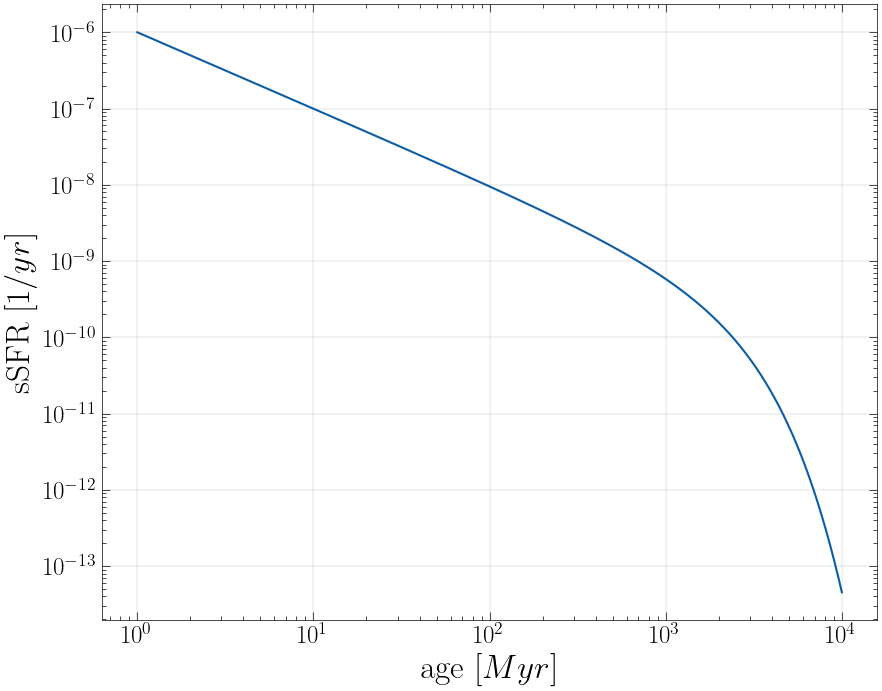

In [166]:
age = np.linspace(10**0, 10**4, 1000) # in Myrs
sSFR_points = sSFR(age*10**6)         # in years
plt.plot(age, sSFR_points)

plt.xlabel("age $[Myr]$")
plt.ylabel("sSFR $[1/yr]$")
plt.xscale('log')
plt.yscale('log')

## 1.1) best.sfh.sfr10Myrs

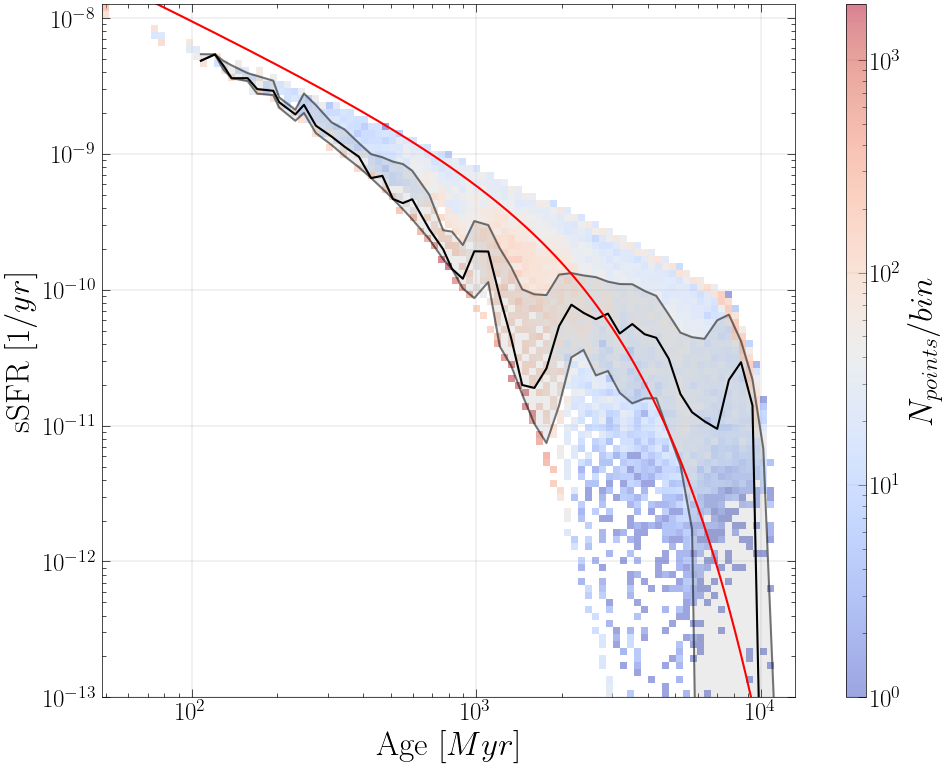

In [167]:
x_data = results['best.stellar.age_m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', 
                                 y_min=1e-13, x_min_bins=1e2, xbins=50, hist2d_nbins=100)
ax.plot(age, sSFR_points, color='red');
plt.savefig("./Images/sSFR_Age")

Abbiamo galassie con sSFR più alto rispetto al modello (closed-box).\
Mantenendo closed-box, avremmo bisogno di un $t_{dyn}$ più basso (--> $\epsilon'$ più alto) e quindi ($t_{dyn} \propto \rho^{-1/2}$) di galassie più dense!

Quindi:
- aumentiamo $t_{dyn}$ e vediamo quale descrive bene le $Age$ elevate;
- se possibile, calcoliamo le densità delle galassie e vediamo se sono maggiori. Fossati dice che ricavare le densità a partire dai dati di Cigale (size che contiene 50% della luminosità $\propto$ raggio galassia) è molto complicato.

Open-box --> inflow di massa

Rotational curve galassia --> Rotazione in alone 

Cambiare massa di un fattore 10 fa cambiare le velocità di radice di 10 at most
**cambiare raggio e velocità viriale(massa) cambia davvero poco per tdyn!!**

Modelllo closed-box --> sSFR deve scendere per forza, difficile che io trovi MS

300/400 km/s 

## 1.2) sSFR vs Mass with age colormap

We see that the galaxies that are not described by the model (keeping Kennicut's numbers) are the old and star-forming ones, i.e. the red ones in this plot

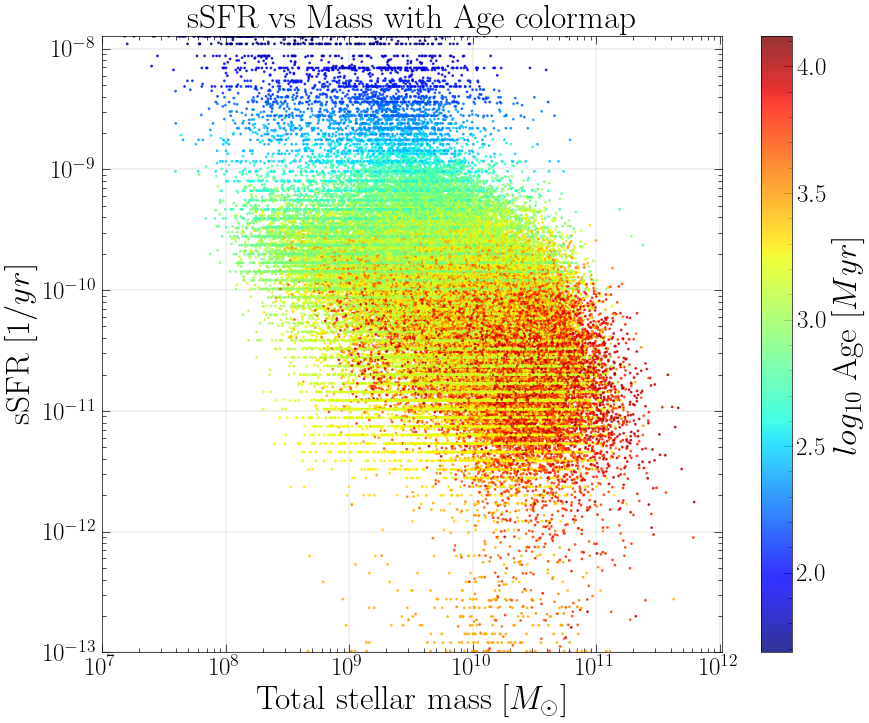

In [10]:
x_data = results['best.stellar.m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
colormap_age = np.log10(results['best.stellar.age_m_star'])

plt.rcParams['figure.figsize'] = [10 , 8]

x_min = 1e7
x_max = np.max(x_data)
y_min = 1e-13
y_max = np.max(y_data)
hist2d_nbins = 200

plt.title(f'sSFR vs Mass with Age colormap')
plt.scatter(x_data, y_data, c=colormap_age, cmap=plt.cm.jet, alpha=0.8, s=1)
plt.colorbar(label='$log_{{10}}$ Age $[Myr]$')

plt.xscale('log')
plt.yscale('log')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xlabel('Total stellar mass $[M_\\odot]$')
plt.ylabel('sSFR $[1/yr]$');

## 1.3) Searching for a $t_{dyn}$ which fits the old star-forming galaxies

Cambiamo $t_{dyn}$ per vedere quale possa descrivere le galassie vecchie con alto $sSFR$ e troviamo la $\rho$ che dovrebbero avere (dovrebbe essere ***unphysical***)

In [11]:
# Define our variables from Kennicut
epsilon = 0.02 
tdyn = np.linspace(2* 10**7,  10**8.5, 6) # in years

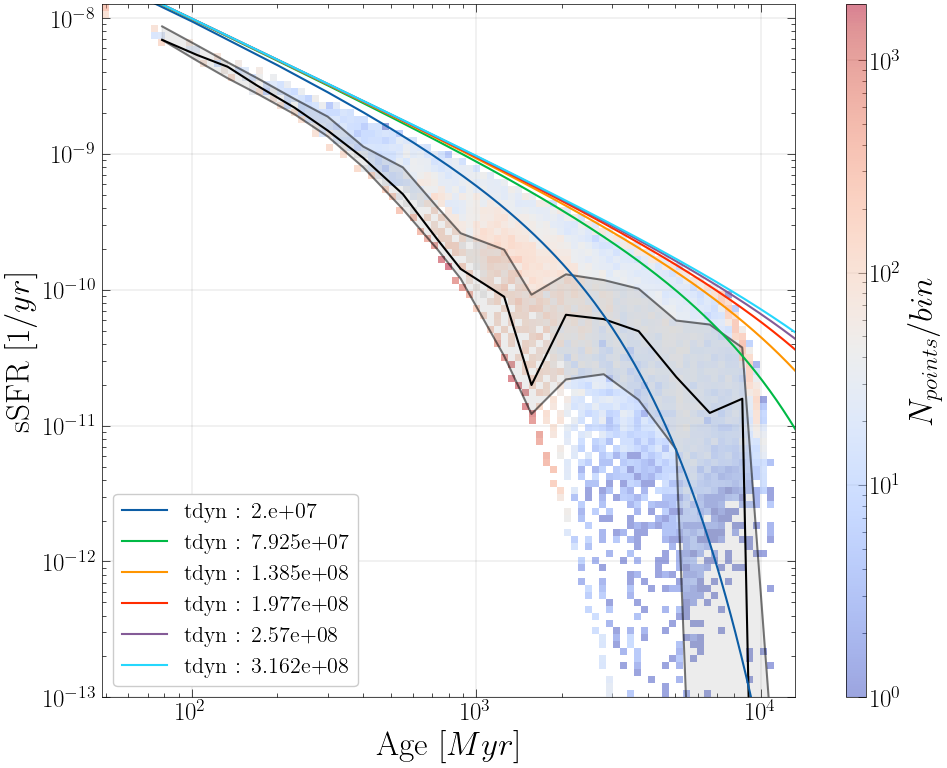

In [12]:
x_data = results['best.stellar.age_m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']

age = np.linspace(10**0, 10**5, 1000) # in Myr

fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', 
                                 y_min=1e-13, xbins=20, hist2d_nbins=100)

for td in tdyn:
    sSFR_points = sSFR(age*10**6, epsilon, td) # in years
    ax.plot(age, sSFR_points, label = f"tdyn : {np.format_float_scientific(td, 3)}")

ax.legend(loc='lower left');

Let's see how the radius goes

In [13]:
radius_1_2 = tdyn / (2*10**7) * 4 # kpc
print(tdyn, "\n", radius_1_2)

[2.00000000e+07 7.92455532e+07 1.38491106e+08 1.97736660e+08
 2.56982213e+08 3.16227766e+08] 
 [ 4.         15.84911064 27.69822128 39.54733192 51.39644256 63.2455532 ]


**Circular velocity doesn't change that much!! 100-300 km/s -- big change is radius**


see Shen 2003 ---> "the sky distribution of galaxies in the sdss" ---> guardiamo size-mass relation ----> non ci sono galassie con raggi così grossi !

size -mass relation in sdss

**Guardiamo class 6 per capire se usare bayes o best!!!**

## 1.4) Estimate of $\tau_{dyn} (M_{star})$

Assumption from Ubler et al: $v_{circ} [km/s] \, = \, v_{ref} \,  \left(\dfrac{M_{star}[M_\odot]}{10^b}\right)^{1/a}$, where $a=3.6$, $b=10.5$, $v_{ref}=242km/s$

Assumption from Van der Wel et al: $R_{circ} [kpc] \, = \, A \left(\dfrac{M_{star}[M_\odot]}{M_{ref}}\right)^\alpha$, where $M_{ref}=5 \times 10^{10}[M_\odot]$


In [14]:
def f_radius_1_2(mass_star, A, alpha):
    return A*(mass_star/5e10)**alpha

def f_v_circ(mass_star):
    return 242*(mass_star/10**10.5)**(1/3.6)

def f_t_dyn(radius_1_2, v_circ):
    return 2e7*(radius_1_2/4)/(v_circ/200)

In [15]:
redshift = np.array([0.25, 0.75, 1.25, 1.75, 2.25, 2.75])
A = 10**(np.array([0.86, 0.78, 0.7, 0.65, 0.55, 0.51]))
alpha = np.array([0.25, 0.22, 0.22, 0.23, 0.22, 0.18])

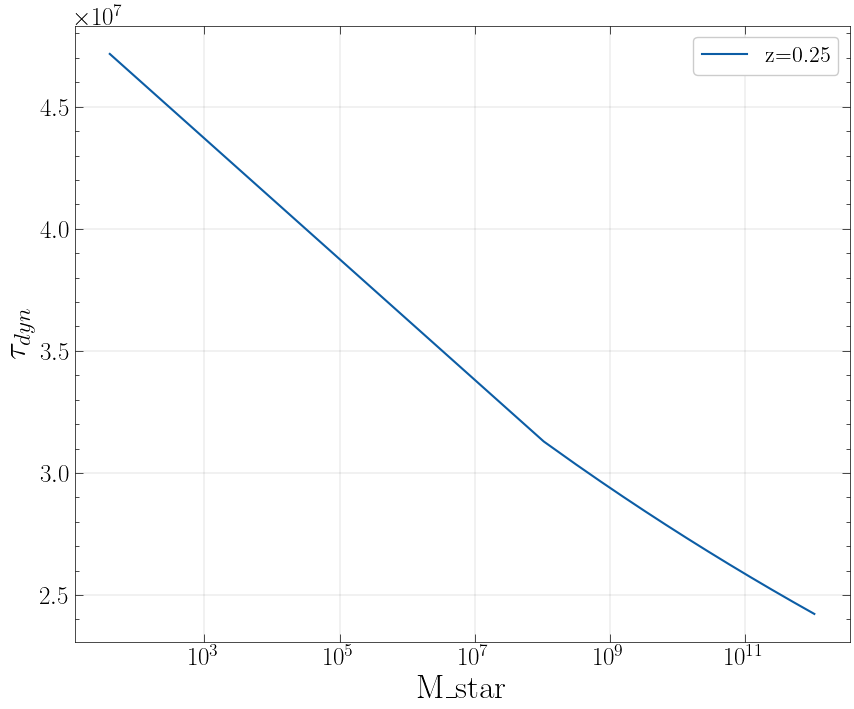

In [16]:
mass_star = results['best.stellar.m_star']
x_dense = np.linspace(np.min(mass_star), np.max(mass_star), 10000)
t_dyn = f_t_dyn(f_radius_1_2(x_dense, A[0], alpha[0]), f_v_circ(x_dense))

plt.plot(x_dense, t_dyn, label=f'z={redshift[0]:.2f}')
plt.xscale('log')
plt.xlabel('M_star')
plt.ylabel('$\\tau_{dyn}$')
plt.legend();

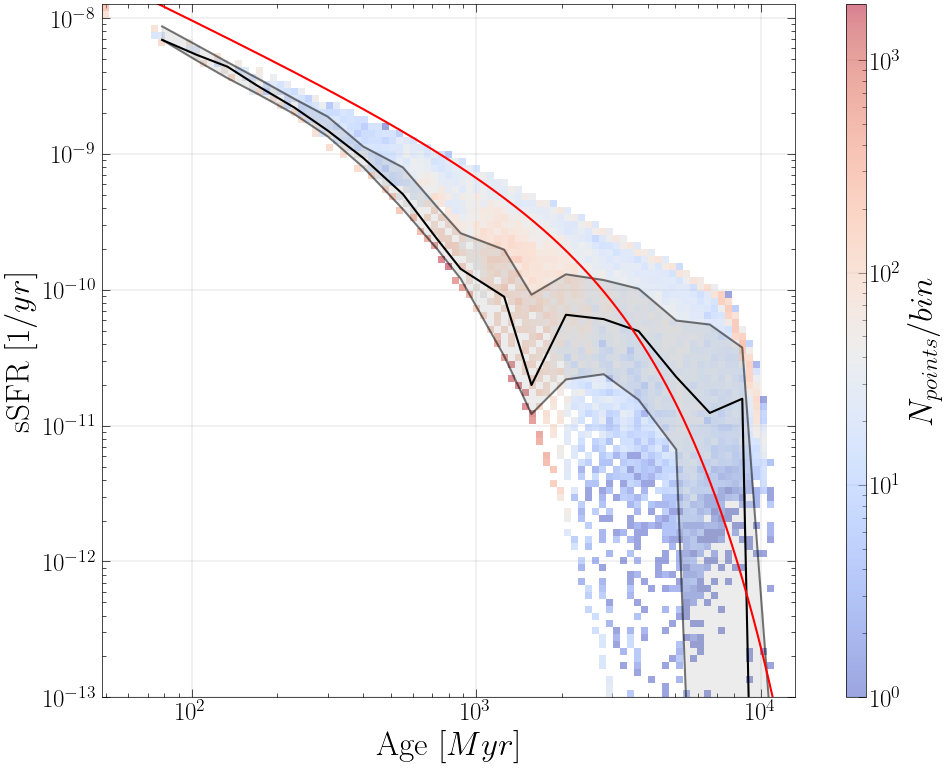

In [17]:
x_data = results['best.stellar.age_m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
x_dense = np.linspace(np.min(x_data), np.max(x_data), 10000)
sSFR_points = sSFR(x_dense*10**6, epsilon, t_dyn) #in years 
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'sSFR $[1/yr]$', 
                                 y_min=1e-13, xbins=20, hist2d_nbins=100)
ax.plot(x_dense, sSFR_points, color='red');

The closed-box model does not correctly explain the two subpopulations.\
To addres this, we should include the exchange of matter among galaxies in our model, which we have neglected so far.

# 2) Metallicity as a function of the age

$Z(t) \, = \, Y \, \epsilon' \, (t-t_0)$

In [18]:
Z_sun = 0.02

def f_metallicity(age, Y, epsilon, tdyn):
    epsilon_primed = epsilon / tdyn
    Z = Y*epsilon_primed*age
    return 8.69+np.log10(Z/Z_sun)

In [19]:
epsilon = 0.02 
tdyn = 2*10**7
Y = 30000

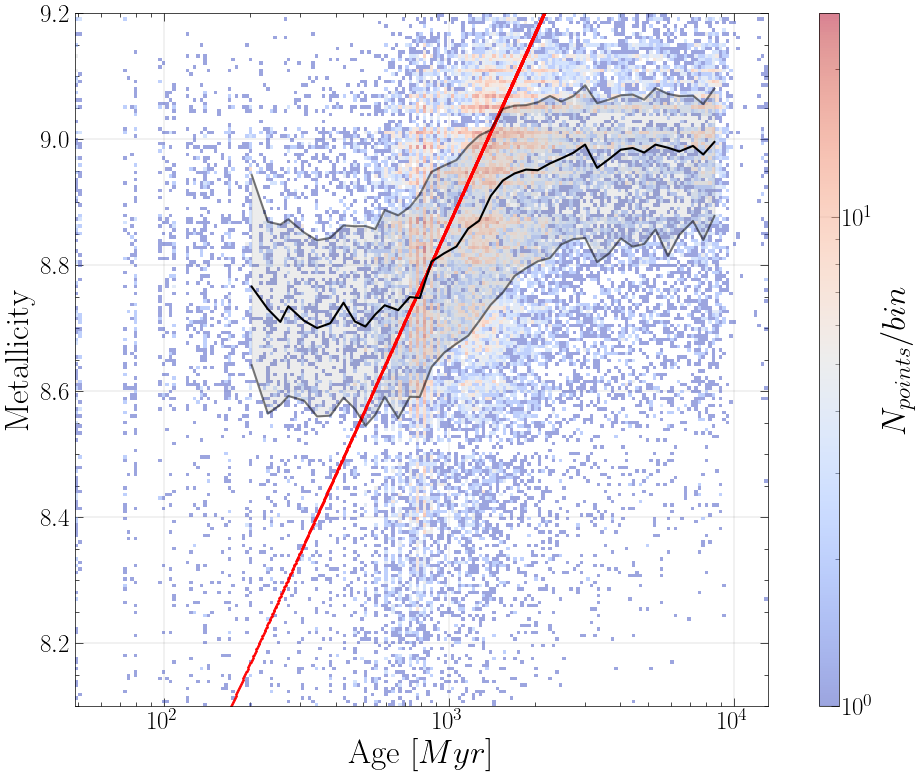

In [20]:
data_Z = Table.read('SDSS_LAB2024_spectroscopy.fits', format='fits')
data_Z = data_Z.to_pandas()

mask = data_Z['log_oh']>-4

x_data = results['best.stellar.age_m_star'][mask]
y_data = data_Z['log_oh'][mask]
x_dense = np.linspace(np.min(x_data), np.max(x_data), 10000)
metallicity = f_metallicity(x_dense, Y, epsilon, tdyn)

fig, ax, statistics, hist = Plot(x_data, y_data, 'Age $[Myr]$', 'Metallicity', 
                                 ylog=False, y_min=8.1, y_max=9.2, x_min_bins=2e2, x_max_bins=9e3)
ax.scatter(x_dense, metallicity, s=1, color='red');

# 3) Open-box: sSFR at equilibrium

## 3.1) $\dot{M}_{gas}^{in}(t)$ as a function of $M_{star}(t)$, $\eta$ and $R$ assumed constant

Let's assume that $\dot{M}^{out}_ {gas}(t) = \eta SFR(t) = \eta \epsilon'M_{gas}(t)$, i.e. that the outflow of gas-mass is dominated by the supernova IIA contribution.

$\color{lime}{\dfrac{dM_{gas}(t)}{dt} \, = \, \dot{M}_{gas}^{in}(t) - (1+\eta-R)\epsilon'M_{gas}(t)}$

We can consider two extremal scenarios:

- if $\dot{M}_{gas}^{in}(t) \gg (1+\eta-R)\epsilon'M_{gas}(t)$, then $M_{gas}(t) = M_{gas}(t_0) + M_{gas}^{in}(t)$  
$M_{gas}(t)$ increases with time, until the condition is not valid anymore.

- if $\dot{M}_{gas}^{in}(t) \ll (1+\eta-R)\epsilon'M_{gas}(t)$, then $M_{gas}(t) = M_{gas}(t_0)\exp{[-(1+\eta-R) (t-t_0)]}$   
It is the closed-box limit.  
$M_{gas}(t)$ decreases with time, until the condition is not valid anymore.

We can also consider the $\color{red}\rm equilibrium \, scenario$: if $\dot{M}_{gas}^{in}(t) = (1+\eta-R)\epsilon'M_{gas}(t)$, then $\dfrac{dM_{gas}(t)}{dt} = 0$ and so $\color{lime}{M^{eq}_{gas}(t) = \dfrac{\dot{M}_{gas}^{in}(t)}{(1+\eta-R)\epsilon'}}$

$SFR^{eq}(t) = \dfrac{\dot{M}_{gas}^{in}(t)}{1+\eta-R} \:\: \Longrightarrow \:\: \color{lime}{sSFR^{eq}(t) = \dfrac{\dot{M}_{gas}^{in}(t)}{1+\eta-R} \, \dfrac{1}{M_{star}(t)}}$

<br>

We would like to express $\dot{M}_{gas}^{in}(t)$ as a function of $M_{star}(t)$.

$\color{lime}{\dot{M}_{gas}^{in}(t) = \xi \, \dot{M}_{halo,gas}^{in}(t) = \xi \, f_b \, \dot{M}_{halo}^{in}(t)}$

We assume:
$\xi =
\begin{cases}
    0 \:\:\:\: {\rm If} \: \tau_{cool} > \tau_{free-fall} \: , \: {\rm i.e.} \: M_{halo} < M_{crit}(z) \: , \: {\rm i.e. \: the \: halo \: is \: in \: hydrostatic \: equilibrium}\\
    1 \:\:\:\: {\rm If} \: \tau_{cool} < \tau_{free-fall} \: , \: {\rm i.e.} \: M_{halo} > M_{crit}(z) \: , \: {\rm i.e. \: the \: halo \: is \: NOT \: in \: hydrostatic \: equilibrium}
\end{cases}$

where $\tau_{cool} = \dfrac{3 n k_B T_{vir}}{2 n^2 \Lambda(T_{vir})}$.

In the case of $z=0$, we can assume that $\xi = 1$ for $M_{halo} \in (10^9 M_\odot, 10^{12} M_\odot)$.

<br>

However, we don't know neither $\dot{M}_{halo}^{in}(t)$ nor $M_{halo}(t)$ and we would like to estimate them as functions of $M_{star}$:

McBride et all: $\color{lime}{\dot{M}_{halo}^{in}(t) = 42 M_{\odot} yr^{-1} \left(\dfrac{M_{halo}}{10^{12}M_{\odot}}\right)^{1.127} (1+1.17z) \sqrt{(1+z)^3 \Omega_m + \Omega_\Lambda}}$

Moster et all provides an empirical relation: $\dfrac{M_{star}}{M_{halo}} = 2N \left[\left(\dfrac{M_{halo}}{M_1}\right)^{-\beta} + \left(\dfrac{M_{halo}}{M_1}\right)^\gamma\right]^{-1}$, where $N$, $M_1$, $\beta$ and $\gamma$ are just parameters whose estimates can be found in the paper.

We have to numerically invert the $M_{\text{star}}(M_{\text{halo}})$ relation.

**Careful!!!** We are assuming $z=0$.

In [21]:
def M_1(z):
    M_10 = 11.590
    M_11 = 1.195
    return 10 ** (M_10 + M_11 * z / (z + 1))

def N(z):
    N_10 = 0.0351
    N_11 = -0.0247
    return N_10 + N_11 * z / (z + 1)

def beta(z):
    beta_10 = 1.376
    beta_11 = -0.826
    return beta_10 + beta_11 * z / (z + 1)

def gamma(z):
    gamma_10 = 0.608
    gamma_11 = 0.329
    return gamma_10 + gamma_11 * z / (z + 1)

def m_star_m_halo(M, z):
    a = (M / M_1(z)) ** (-beta(z))
    b = (M / M_1(z)) ** (gamma(z))
    return 2 * M * N(z) / (a + b)

In [22]:
M_grid = np.logspace(8, 16, 10000)

m_star = m_star_m_halo(M_grid, z=0)

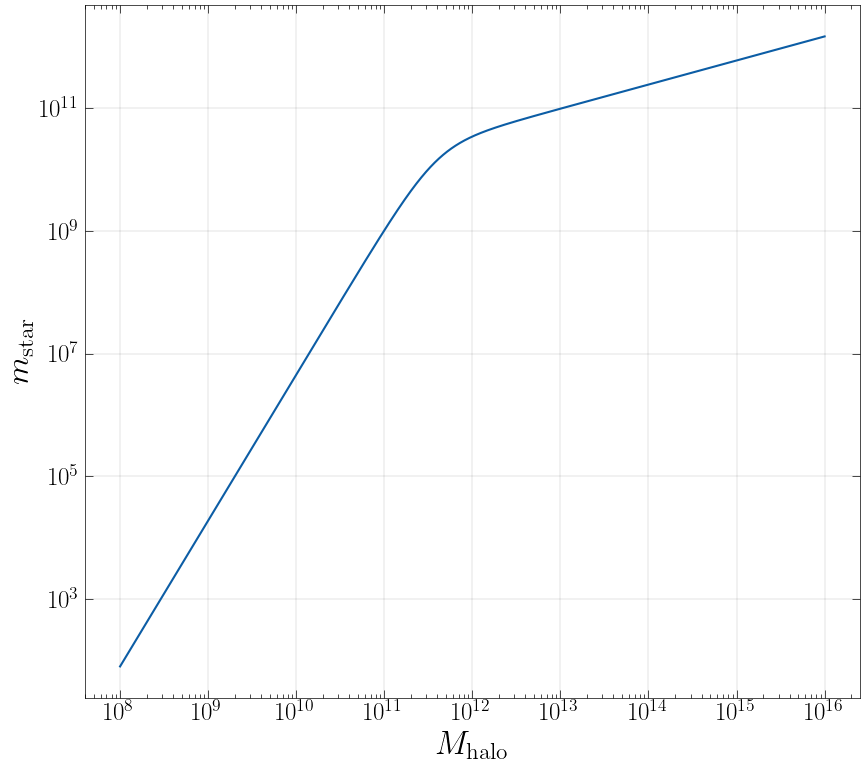

In [23]:
fig, ax = plt.subplots(figsize=(10, 9))

ax.set_xlabel(r'$M_{\text{halo}}$')
ax.set_ylabel(r'$m_{\text{star}}$')

ax.plot(M_grid, m_star)

ax.set_xscale('log')
ax.set_yscale('log')
plt.show()
plt.savefig("./Images/m_star_m_halo_DIRETTA")

In [24]:
from numpy.polynomial.legendre import Legendre

# The fit with Legendre polynomials has to be done in log units since we are visualizing data in log units
# The reason is that the fit method uses a LEAST SQUARES approach and if we fit in linear units
# the higher powers will be wheighted more than the lower ones in the fit, leading to underfit of the data
# for low masses.
# Then to evaluate one have to pass log units to the __call__() method and exponetiate the result
leg = Legendre.fit(np.log10(m_star), np.log10(M_grid), deg=1000)
leg.domain

/home/malvi/venv/lib/python3.11/site-packages/numpy/polynomial/legendre.py:1412: RankWarning: The fit may be poorly conditioned
  return pu._fit(legvander, x, y, deg, rcond, full, w)


array([ 1.90649708, 12.16505711])

In [25]:
m_halo_min = 1e9
m_halo_max = 10**11.6
m_star_min, m_star_max = m_star_m_halo(np.array([m_halo_min, m_halo_max]), z=0)
print(m_star_min)
print(m_star_max)

19164.34389692211
14093985870.13291


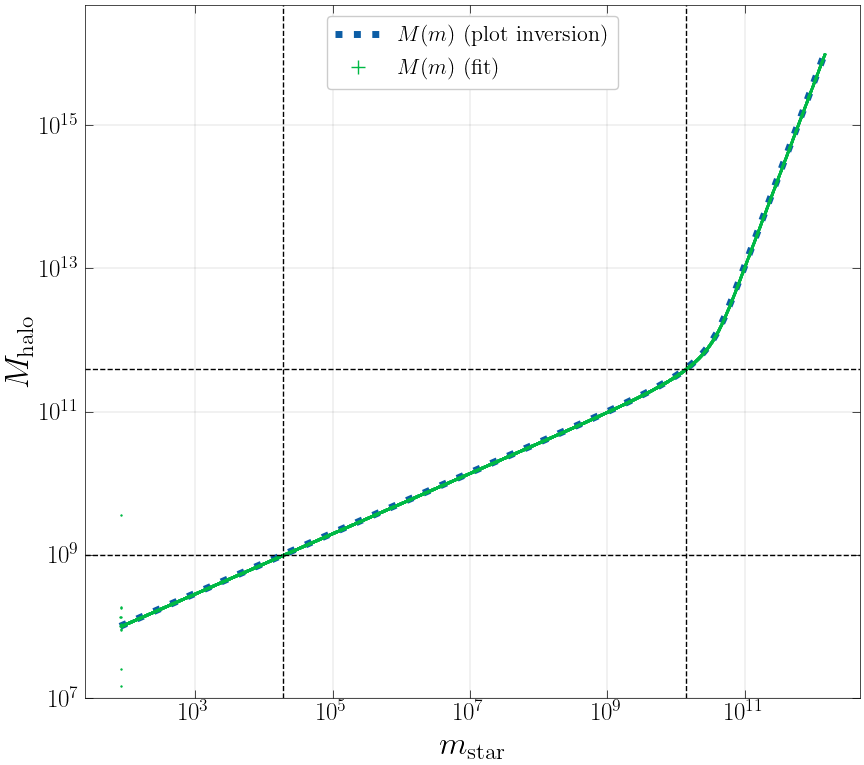

In [117]:
fig, ax = plt.subplots(figsize=(10, 9))

# Original curve
ax.plot(m_star, M_grid, linewidth=5, label=r'$M(m)$ (plot inversion)', ls=':')

ax.set_xlabel(r'$m_{\text{star}}$')
ax.set_ylabel(r'$M_{\text{halo}}$')

# Inverse fit
x_grid = np.logspace(leg.domain[0], leg.domain[1], 10000)
y_grid = 10 ** leg.__call__(np.log10(x_grid))
ax.plot(x_grid, y_grid, ls='', marker='+', markersize=1, label=r'$M(m)$ (fit)')
ax.axhline(m_halo_min, ls='--', lw=1, c='black')
ax.axhline(m_halo_max, ls='--', lw=1, c='black')
ax.axvline(m_star_min, ls='--', lw=1, c='black')
ax.axvline(m_star_max, ls='--', lw=1, c='black')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e7)

ax.legend(markerscale=10, loc= 'upper center');
plt.savefig("./Images/M_halovsM_star")

In [199]:
def m_dot_in(M, z):
    M_0 = 10**12
    Omega_m = 0.3
    Omega_L = 1 - Omega_m
    
    return 42 * ((M / M_0) ** (1.127)) * (1 + 1.17 * z) * np.sqrt(Omega_m * (1 + z) ** 3 + Omega_L)

def sSFR_vs_mass(m_star, fb, eta, R, z):
    return fb * m_dot_in(10 ** leg.__call__(np.log10(m_star)), z) / (1+eta-R) / m_star

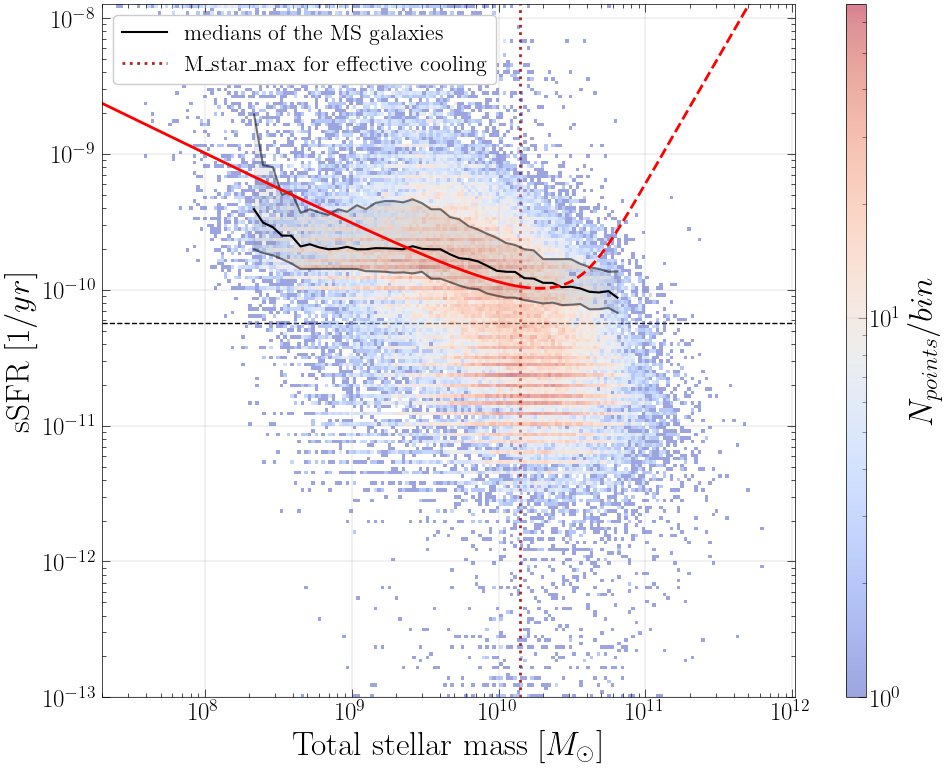

In [200]:
x_data = results['best.stellar.m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'sSFR $[1/yr]$', MS_mask,
                                 x_min=2e7, y_min=1e-13, x_min_bins=2e8, x_max_bins=7e10)

x_data = np.sort(np.array(results['best.stellar.m_star']))
x_plot = x_data[np.logical_and((m_star_min<=x_data), (x_data<=m_star_max))]
sSFRvsmass = sSFR_vs_mass(x_plot, fb=0.15, eta=0.9, R=0.4, z=0)
ax.plot(x_plot, sSFRvsmass, lw=2, color='red')

x_plot = x_data[x_data>m_star_max]
sSFRvsmass = sSFR_vs_mass(x_plot, fb=0.15, eta=0.9, R=0.4, z=0)
ax.plot(x_plot, sSFRvsmass, lw=2, ls='--', color='red')

ax.axvline(m_star_max, ls=':', lw=2, c='firebrick', zorder=0, label = "M_star_max for effective cooling")

ax.axhline(sSFR_threshold, ls='--', lw=1, c='black', zorder=0);
ax.legend();
plt.savefig("./Images/open_box_MS")

# 4) Open-box: complete model

## 4.1) Prof code

In [173]:
import astropy.units as u
from astropy.cosmology import Planck13, z_at_value

In [188]:
# Set global parameters 
dt       = 0.01 #Gyr
eps      = 0.02
eta      = 4
R        = 0.1  # in [0,1]
f_b      = 0.15
M_h_min  = m_halo_min # 10^9
M_h_max  = m_halo_max # 10^11.6
M_h_form = 5.e8 # dark-matter halo mass at t_form

In [189]:
# Set global arrays
t = np.arange(dt, 13.1, dt) #Gyr
z = t*0.
t_dyn = t*0.
for i in range(len(t)):
    z[i] = z_at_value(Planck13.age, t[i] * u.Gyr)
    t_dyn[i] = 2.e7*(1+z[i])**(-0.75) #yr

In [190]:
def evolve_galaxy(t_form, t_obs, M_h_in):
    # Initialize arrays
    M_h = t*0.
    M_g = t*0.
    M_s = t*0.
    SFR = t*0.
    
    # Cycle
    for i in range(len(t)):
        if t[i] < t_form:
            M_h[i] = M_h_in
        elif t[i] < t_obs:
            M_dot_h = 42.0 * ((M_h[i-1]/1.e12)**1.127) * (1+1.17*z[i]) * (0.3*(1+z[i])**3+0.7)**0.5 #M_sun/yr
            M_h[i] = M_h[i-1] + M_dot_h*dt*1.e9 #Gyr -> yr
            if M_h[i]< M_h_min:
                csi=0.0
            elif M_h[i]> M_h_min and M_h[i]< M_h_max:
                csi=1.0
            else:
                csi=0.0 
                #csi = (M_h_max/M_h[i])
            #eta = (M_h[i]/M_h_max)**(1/3)
            M_g[i]= M_g[i-1] + dt*1.e9*(f_b*csi*M_dot_h - M_g[i-1]*(1+eta-R)*eps/t_dyn[i])
            SFR[i] = M_g[i] * eps/t_dyn[i]
            M_s[i] = M_s[i-1] + SFR[i]*dt*1.e9
        else:
            M_h[i] = M_h[i-1]
            M_g[i] = M_g[i-1]
            M_s[i] = M_s[i-1]
            SFR[i] = SFR[i-1]
        
    return M_h, M_g, M_s, SFR

### Implementation of Davé's csi, assuming that it is independent from redshift (actually, it is not)

eps      = 0.02
eta      = 1.3
R        = 0.4   
f_b      = 0.15
M_h_min  = m_halo_min
M_h_max  = m_halo_max
M_h_form = 5.e8 

def evolve_galaxy(t_form, t_obs, M_h_in):
    # Initialize arrays
    M_h = t*0.
    M_g = t*0.
    M_s = t*0.
    SFR = t*0.
    
    # Cycle
    for i in range(len(t)):
        if t[i] < t_form:
            M_h[i] = M_h_in
        elif t[i] < t_obs:
            M_dot_h = 42.0 * ((M_h[i-1]/1.e12)**1.127) * (1+1.17*z[i]) * (0.3*(1+z[i])**3+0.7)**0.5 #M_sun/yr
            M_h[i] = M_h[i-1] + M_dot_h*dt*1.e9 #Gyr -> yr
            csi_photo  = (1 + (1/3)*(M_h[i]/M_h_min)**(-2))**(-1.5)
            csi_quench = (1 + (1/3)*(M_h[i]/M_h_max)**2)**(-1.5)
            csi_grav   = np.piecewise(M_h[i], [M_h[i]<4*M_h_min, M_h[i]>=4*M_h_min], [1, 0.47*(((1+0)/4)**0.38)*(M_h[i]/M_h_max)**(-0.25)])
            csi_winds  = (1 + (1/3)*(M_h[i]/M_h_min)**(-0.5))**(-1.5)
            csi = csi_photo * csi_quench * csi_grav * csi_winds
            #eta = (M_h[i]/M_h_max)**(1/3)
            M_g[i]= M_g[i-1] + dt*1.e9*(f_b*csi*M_dot_h - M_g[i-1]*(1+eta-R)*eps/t_dyn[i])
            SFR[i] = M_g[i] * eps/t_dyn[i]
            M_s[i] = M_s[i-1] + SFR[i]*dt*1.e9
        else:
            M_h[i] = M_h[i-1]
            M_g[i] = M_g[i-1]
            M_s[i] = M_s[i-1]
            SFR[i] = SFR[i-1]
        
    return M_h, M_g, M_s, SFR

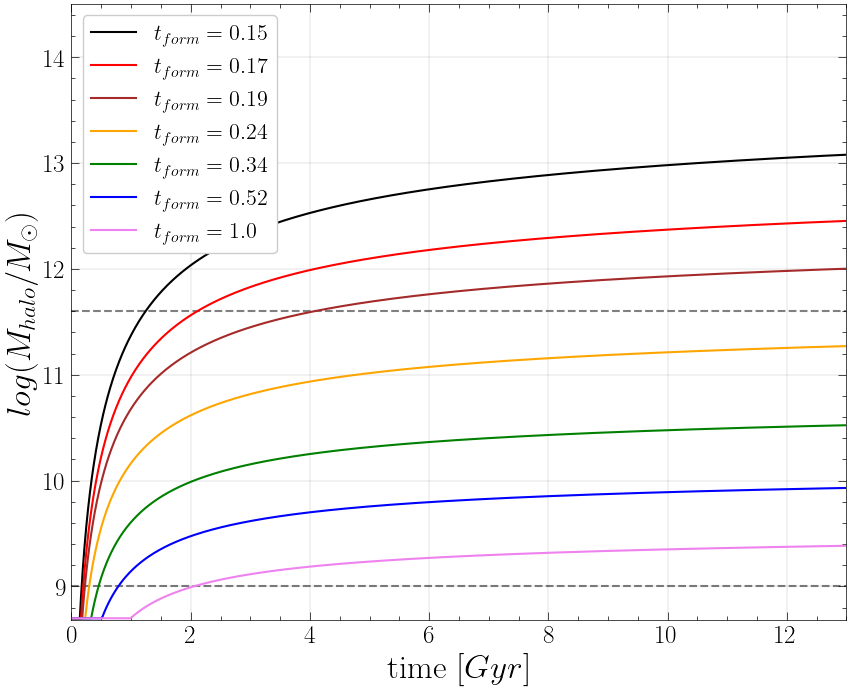

In [191]:
t_form_plot = [0.15, 0.17, 0.19, 0.24, 0.34, 0.52, 1.00]
col_plot= ['black', 'red', 'brown', 'orange', 'green', 'blue', 'violet']

# Plot M_h, time evolution
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR = evolve_galaxy(t_form=t_form_plot[i], t_obs=13, M_h_in=M_h_form)
    plt.plot(t, np.log10(np.where(M_h>0, M_h, 1.0)), color=col_plot[i], label=f'$t_{{form}}={t_form_plot[i]}$')
    
plt.axhline(y=np.log10(M_h_min), color='grey', linestyle='--', zorder=0)
plt.axhline(y=np.log10(M_h_max), color='grey', linestyle='--', zorder=0)
plt.xlim(0, 13)
plt.ylim(8.68, 14.5)
plt.xlabel('time $[Gyr]$')
plt.ylabel('$log(M_{halo}/M_\\odot)$')
plt.legend();
plt.savefig("./Images/M_halo_time_Dave")

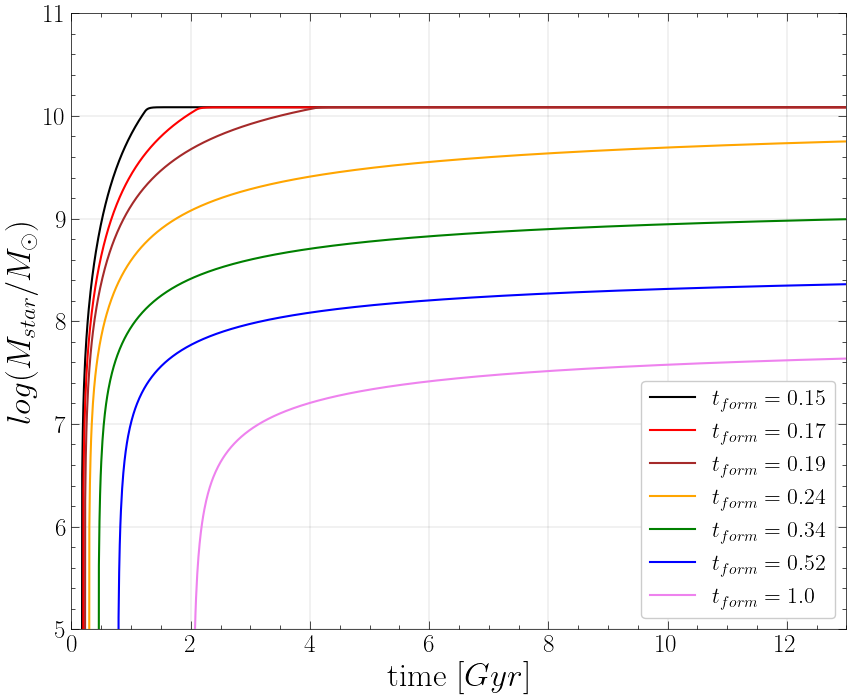

In [192]:
# Plot M_g, time evolution 
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR = evolve_galaxy(t_form=t_form_plot[i], t_obs=13, M_h_in=M_h_form)
    plt.plot(t, np.log10(np.where(M_s>0, M_s, 1.0)), color=col_plot[i], label=f'$t_{{form}}={t_form_plot[i]}$')

plt.xlim(0, 13)
plt.ylim(5, 11)
plt.xlabel('time $[Gyr]$')
plt.ylabel('$log(M_{star}/M_\\odot)$')
plt.legend();
plt.savefig("./Images/M_star_time_Dave")

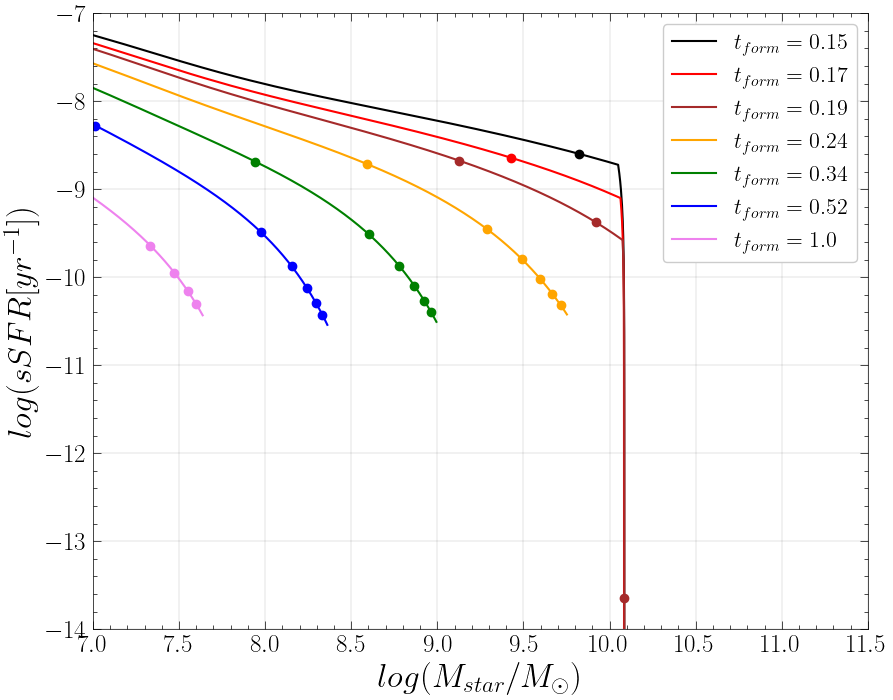

In [193]:
# Plot sSFR
for i in range(len(t_form_plot)):
    M_h, M_g, M_s, SFR = evolve_galaxy(t_form=t_form_plot[i], t_obs=13, M_h_in=M_h_form)
    t_mark = np.arange(1., 13., 2.)
    M_s_ = np.where(M_s>0, M_s, 1.0)
    SFR_ = np.where(SFR>0, SFR, 1e-10)
    sSFR= SFR_/M_s_
    plt.plot(np.log10(M_s_), np.log10(sSFR), color=col_plot[i], label=f'$t_{{form}}={t_form_plot[i]}$')
    for tt in t_mark:
        plt.plot(np.log10(M_s_[t==tt]), np.log10(sSFR[t==tt]), color=col_plot[i], marker='o')

plt.xlim(7,11.5)
plt.ylim(-14, -7)
plt.xlabel('$log(M_{star}/M_\\odot)$') 
plt.ylabel('$log(sSFR[yr^{-1}])$')
plt.legend();
plt.savefig("./Images/sSFR_M_star_diff_times_Dave")

## 4.2) Testing the $M_{star}$ - $M_{halo}$ relation

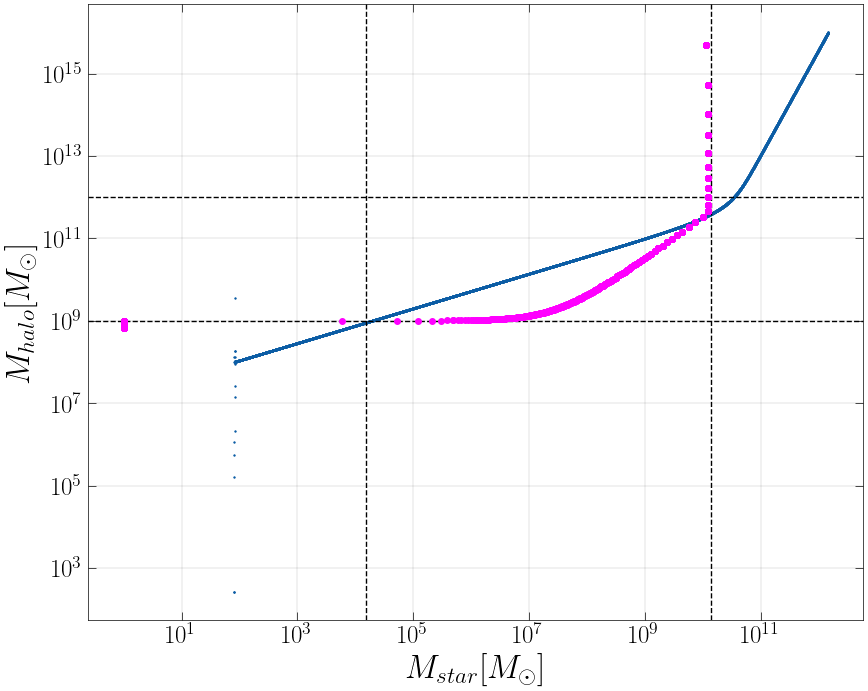

In [194]:
t_form = np.logspace(np.log10(0.1), np.log10(5), 1000)

plt.plot(x_grid, y_grid, ls='', marker='+', markersize=1)
plt.axhline(10**9, ls='--', lw=1, c='black')
plt.axhline(10**12, ls='--', lw=1, c='black')
plt.axvline(1.5*10**4, ls='--', lw=1, c='black')
plt.axvline(1.4*10**10, ls='--', lw=1, c='black')

for i in range(len(t_form)):
    M_h, M_g, M_s, SFR = evolve_galaxy(t_form=t_form[i], t_obs=13, M_h_in=M_h_form)
    M_s_ = np.where(M_s>0, M_s, 1.0)
    M_h_ = np.where(M_h>0, M_h, 1.0)
    t_plot = np.isclose(t, 13, rtol=1e-4)
    plt.plot(M_s_[t_plot], M_h_[t_plot], marker='o', markersize=4, color='magenta')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$M_{star}[M_\\odot]$') 
plt.ylabel('$M_{halo}[M_\\odot]$');
plt.savefig("./Images/M_halovsM_star_withpurpleCanta")

## 4.3) Applying the code to the data

In [195]:
z_mean = np.mean(data['redshift'])
z_mean

0.053807276843311734

In [196]:
time_z_mean = Planck13.lookback_time(10000).value - Planck13.lookback_time(z_mean).value
print(time_z_mean, 'Gyrs')

13.049544199004435 Gyrs


In [197]:
def plot_sSFR(ax, t_mark, t_form, M_h_form):
    M_s_array = []
    sSFR_array = []
    
    for i in range(len(t_form)):
        M_h, M_g, M_s, SFR = evolve_galaxy(t_form=t_form[i], t_obs=t_mark, M_h_in=M_h_form)
        M_s_ = np.where(M_s>0, M_s, 1.0)
        SFR_ = np.where(SFR>0, SFR, 1e-10)
        sSFR_ = SFR_/M_s_
        t_plot = np.isclose(t, t_mark, rtol=1e-3)
        M_s_array.append(M_s_[t_plot])
        sSFR_array.append(sSFR_[t_plot])
    M_s_array = np.array(M_s_array)
    sSFR_array = np.array(sSFR_array)
    ax.plot(M_s_array, 5.5*sSFR_array, marker='.', markersize=4, color='red')

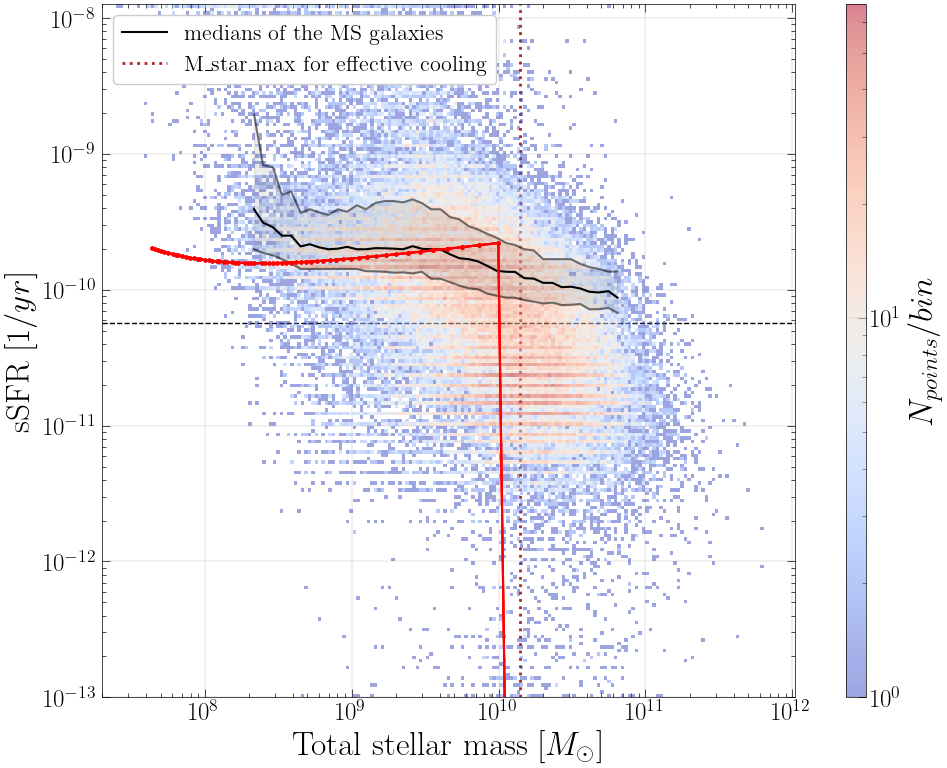

In [198]:
x_data = results['best.stellar.m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']

t_form = np.logspace(np.log10(0.1), np.log10(1), 100)
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'sSFR $[1/yr]$', MS_mask, 
                                 x_min=2e7, y_min=1e-13, x_min_bins=2e8, x_max_bins=7e10)
plot_sSFR(ax, time_z_mean, t_form, M_h_form)

ax.axvline(m_star_max, ls=':', lw=2, c='firebrick', zorder=0, label = "M_star_max for effective cooling")
ax.axhline(sSFR_threshold, ls='--', lw=1, c='black', zorder=0);

ax.legend();

plt.savefig("./Images/sSFR_mass_Cantacode_csi_old_5-5")

## 4.4) Open-box at equilibrium model + closed-box model

In [170]:
def Delta_t_from_eq(m_star, m_star_0, z):
    num = 10 ** leg.__call__(np.log10(m_star)) - 10 ** leg.__call__(np.log10(m_star_0))
    return num / m_dot_in(10 ** leg.__call__(np.log10(m_star)), z)

def sSFR(m_star, m_gas_0, m_star_0, z, R, epsilon, tdyn):
    factor = (epsilon / tdyn) * (1 - R)
    m_gas = m_gas_0 * np.exp(-factor * Delta_t_from_eq(m_star, m_star_0, z))
    return (epsilon / tdyn) * m_gas / m_star

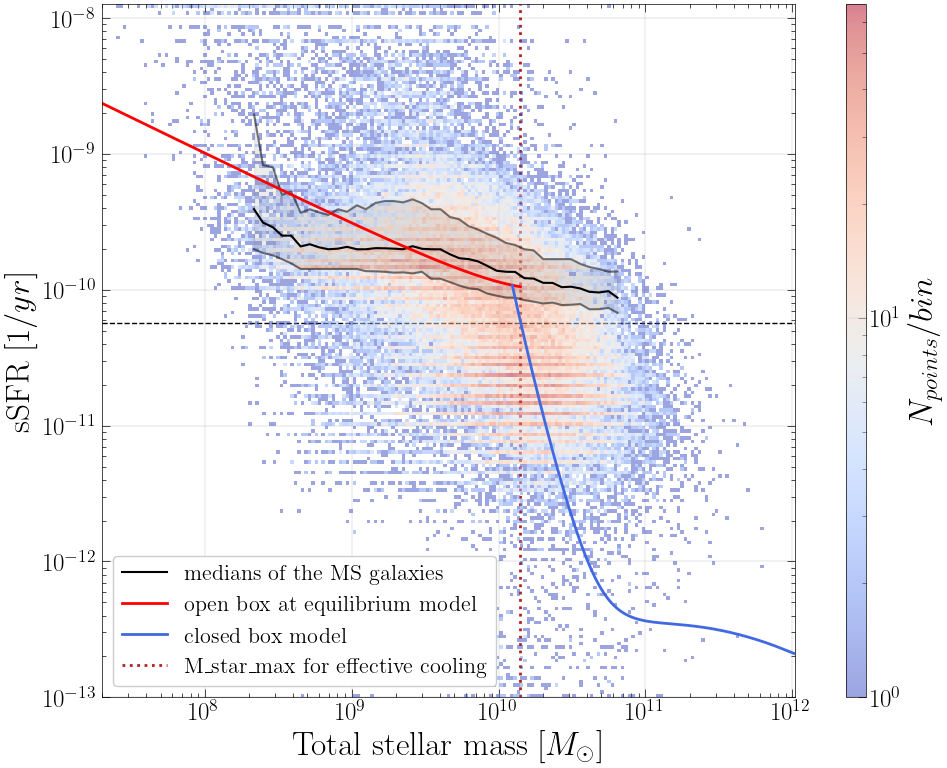

In [171]:
x_data = results['best.stellar.m_star']
y_data = results['best.sfh.sfr10Myrs']/results['best.stellar.m_star']

t_form = np.logspace(np.log10(0.1), np.log10(1), 100)
    
fig, ax, statistics, hist = Plot(x_data, y_data, 'Total stellar mass $[M_\odot]$', 'sSFR $[1/yr]$', MS_mask, 
                                 x_min=2e7, y_min=1e-13, x_min_bins=2e8, x_max_bins=7e10)

x_data = np.sort(np.array(results['best.stellar.m_star']))
x_plot = x_data[np.logical_and((m_star_min<=x_data), (x_data<=m_star_max))]
sSFRvsmass = sSFR_vs_mass(x_plot, fb=0.15, eta=0.9, R=0.4, z=0)
ax.plot(x_plot, sSFRvsmass, lw=2, color='red',  label = "open box at equilibrium model")

x_plot = x_data[x_data>0.88*m_star_max]
sSFRvsmass = sSFR(x_plot, m_gas_0=10**9.5, m_star_0=m_star_m_halo(10**11.6, z=z_mean), z=z_mean, 
                  R=0.4, epsilon=0.01, tdyn=2.7e7)
ax.plot(x_plot, sSFRvsmass, lw=2, color='royalblue', label = "closed box model")

ax.axvline(m_star_max, ls=':', lw=2, c='firebrick', zorder=0, label = "M_star_max for effective cooling")
ax.axhline(sSFR_threshold, ls='--', lw=1, c='black', zorder=0);
ax.legend();
plt.savefig("./Images/sSFR_mass_due_andamenti")